# Logistic Regression with L2 regularization

In [1]:
import pandas as pd
from __future__ import division
import numpy as np
import graphlab

## Load and process review dataset

In [2]:
products = graphlab.SFrame("E:\\Machine Learning\\U.W\\Classification\\amazon_baby_subset.gl")
products.save("E:\\Machine Learning\\U.W\\Classification\\amazon_baby_subset.csv", format="csv")
products = pd.read_csv("E:\\Machine Learning\\U.W\\Classification\\amazon_baby_subset.csv")

This non-commercial license of GraphLab Create for academic use is assigned to lxn1021@gmail.com and will expire on November 18, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Xiaoning\AppData\Local\Temp\graphlab_server_1558214675.log.0


In [3]:
products.head()

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1


In [4]:
import json

In [5]:
with open("E:\\Machine Learning\\U.W\\Classification\\important_words.json", "r") as f:
    important_words = json.load(f)
    
important_words = [str(s) for s in important_words]

In [6]:
important_words

['baby',
 'one',
 'great',
 'love',
 'use',
 'would',
 'like',
 'easy',
 'little',
 'seat',
 'old',
 'well',
 'get',
 'also',
 'really',
 'son',
 'time',
 'bought',
 'product',
 'good',
 'daughter',
 'much',
 'loves',
 'stroller',
 'put',
 'months',
 'car',
 'still',
 'back',
 'used',
 'recommend',
 'first',
 'even',
 'perfect',
 'nice',
 'bag',
 'two',
 'using',
 'got',
 'fit',
 'around',
 'diaper',
 'enough',
 'month',
 'price',
 'go',
 'could',
 'soft',
 'since',
 'buy',
 'room',
 'works',
 'made',
 'child',
 'keep',
 'size',
 'small',
 'need',
 'year',
 'big',
 'make',
 'take',
 'easily',
 'think',
 'crib',
 'clean',
 'way',
 'quality',
 'thing',
 'better',
 'without',
 'set',
 'new',
 'every',
 'cute',
 'best',
 'bottles',
 'work',
 'purchased',
 'right',
 'lot',
 'side',
 'happy',
 'comfortable',
 'toy',
 'able',
 'kids',
 'bit',
 'night',
 'long',
 'fits',
 'see',
 'us',
 'another',
 'play',
 'day',
 'money',
 'monitor',
 'tried',
 'thought',
 'never',
 'item',
 'hard',
 'plasti

In [9]:
def remove_punctuation(text):
    import string
    
    for punc in string.punctuation:
        text = text.replace(punc, "")
        
    return text

In [11]:
products["review"].fillna("0", inplace=True)

In [12]:
products["review_clean"] = products["review"].apply(remove_punctuation)

In [17]:
products["review_clean"][0].split().count("and")

2

In [18]:
for word in important_words:
    products[word] = products["review_clean"].apply(lambda s: s.split().count(word))

In [19]:
products.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Train-Validation split

In [20]:
from sklearn.model_selection import train_test_split 

In [21]:
train_data, validation_data = train_test_split(products, test_size=0.2, random_state=2)

print "Training   set:   %d data points" % len(train_data)
print "Validation set:   %d data points" % len(validation_data)

Training   set:   42457 data points
Validation set:   10615 data points


## Convert SFrame to NumPy array

In [22]:
def get_numpy_data(data_df, features, label):
    data_df["intercept"] = 1
    features = ["intercept"] + features
    features_df = data_df[features]
    feature_matrix = np.array(features_df)
    label_df= data_df[label]
    label_array = np.array(label_df)
    
    return (feature_matrix, label_array)

In [23]:
get_numpy_data(train_data, important_words, "sentiment")

c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(array([[1, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0]], dtype=int64),
 array([-1,  1,  1, ...,  1, -1,  1], dtype=int64))

In [24]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, "sentiment")
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, "sentiment")

c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Building on logistic regression with no L2 penalty assignment

$$
P(y_i = +1 | \mathbf{x}_i,\mathbf{w}) = \frac{1}{1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))},
$$


In [25]:
def predict_probability(feature_matrix, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    predictions = 1/(1 + np.exp(-scores))
    
    return predictions

# Adding  L2 penalty

Recall from lecture and the previous assignment that for logistic regression without an L2 penalty, the derivative of the log likelihood function is:
$$
\frac{\partial\ell}{\partial w_j} = \sum_{i=1}^N h_j(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right)
$$

** Adding L2 penalty to the derivative** 

It takes only a small modification to add a L2 penalty. All terms indicated in **red** refer to terms that were added due to an **L2 penalty**.

* Recall from the lecture that the link function is still the sigmoid:
$$
P(y_i = +1 | \mathbf{x}_i,\mathbf{w}) = \frac{1}{1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))},
$$
* We add the L2 penalty term to the per-coefficient derivative of log likelihood:
$$
\frac{\partial\ell}{\partial w_j} = \sum_{i=1}^N h_j(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right) \color{red}{-2\lambda w_j }
$$

The **per-coefficient derivative for logistic regression with an L2 penalty** is as follows:
$$
\frac{\partial\ell}{\partial w_j} = \sum_{i=1}^N h_j(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right) \color{red}{-2\lambda w_j }
$$
and for the intercept term, we have
$$
\frac{\partial\ell}{\partial w_0} = \sum_{i=1}^N h_0(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right)
$$

In [26]:
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant):
    derivative = np.dot(errors, feature)
    
    if not feature_is_constant:
        derivative -= (2 * l2_penalty * coefficient)
        
    return derivative

To verify the correctness of the gradient ascent algorithm, we provide a function for computing log likelihood (which we recall from the last assignment was a topic detailed in an advanced optional video, and used here for its numerical stability).

$$\ell\ell(\mathbf{w}) = \sum_{i=1}^N \Big( (\mathbf{1}[y_i = +1] - 1)\mathbf{w}^T h(\mathbf{x}_i) - \ln\left(1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))\right) \Big) \color{red}{-\lambda\|\mathbf{w}\|_2^2} $$

In [27]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    
    lp = np.sum((indicator-1)*scores - np.log(1 + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    
    return lp

In [28]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients)
    
    for itr in xrange(max_iter):
        predictions = predict_probability(feature_matrix, coefficients)
        indicator = (sentiment==+1)
        errors = indicator - predictions
        
        for j in xrange(len(coefficients)):
            is_intercept = (j==0)
            derivative = feature_derivative_with_L2(errors, feature_matrix[:,j], coefficients[j], l2_penalty, is_intercept)
            coefficients[j] += step_size * derivative
        
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
            print "iteration %*d: log likelihood of observed labels = %.8f" % \
                (int(np.ceil(np.log10(max_iter))), itr, lp)
            
    return coefficients

# Explore effects of L2 regularization

In [30]:
# run with L2 = 0
coefficients_0_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                    initial_coefficients=np.zeros(194),
                                                    step_size=5e-6, l2_penalty=0, max_iter=501)

iteration   0: log likelihood of observed labels = -29244.82697959
iteration   1: log likelihood of observed labels = -29068.30359513
iteration   2: log likelihood of observed labels = -28898.56887514
iteration   3: log likelihood of observed labels = -28735.03180945
iteration   4: log likelihood of observed labels = -28577.23777802
iteration   5: log likelihood of observed labels = -28424.81887564
iteration   6: log likelihood of observed labels = -28277.46424082
iteration   7: log likelihood of observed labels = -28134.90216992
iteration   8: log likelihood of observed labels = -27996.88918670
iteration   9: log likelihood of observed labels = -27863.20324128
iteration  10: log likelihood of observed labels = -27733.63937739
iteration  11: log likelihood of observed labels = -27608.00688484
iteration  12: log likelihood of observed labels = -27486.12735202
iteration  13: log likelihood of observed labels = -27367.83326901
iteration  14: log likelihood of observed labels = -27252.9669

In [32]:
# run with L2=4
coefficients_4_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                    initial_coefficients=np.zeros(194),
                                                    step_size=5e-6, l2_penalty=4, max_iter=501)

iteration   0: log likelihood of observed labels = -29244.83070246
iteration   1: log likelihood of observed labels = -29068.32529832
iteration   2: log likelihood of observed labels = -28898.62168470
iteration   3: log likelihood of observed labels = -28735.12788260
iteration   4: log likelihood of observed labels = -28577.38841330
iteration   5: log likelihood of observed labels = -28425.03459435
iteration   6: log likelihood of observed labels = -28277.75485205
iteration   7: log likelihood of observed labels = -28135.27682577
iteration   8: log likelihood of observed labels = -27997.35643114
iteration   9: log likelihood of observed labels = -27863.77105431
iteration  10: log likelihood of observed labels = -27734.31521562
iteration  11: log likelihood of observed labels = -27608.79771880
iteration  12: log likelihood of observed labels = -27487.03970065
iteration  13: log likelihood of observed labels = -27368.87323155
iteration  14: log likelihood of observed labels = -27254.1402

In [33]:
# run with L2 = 10
coefficients_10_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                     initial_coefficients=np.zeros(194),
                                                     step_size=5e-6, l2_penalty=10, max_iter=501)

iteration   0: log likelihood of observed labels = -29244.83628677
iteration   1: log likelihood of observed labels = -29068.35785089
iteration   2: log likelihood of observed labels = -28898.70088839
iteration   3: log likelihood of observed labels = -28735.27196338
iteration   4: log likelihood of observed labels = -28577.61430593
iteration   5: log likelihood of observed labels = -28425.35806482
iteration   6: log likelihood of observed labels = -28278.19059547
iteration   7: log likelihood of observed labels = -28135.83854944
iteration   8: log likelihood of observed labels = -27998.05692805
iteration   9: log likelihood of observed labels = -27864.62226969
iteration  10: log likelihood of observed labels = -27735.32830785
iteration  11: log likelihood of observed labels = -27609.98311569
iteration  12: log likelihood of observed labels = -27488.40715127
iteration  13: log likelihood of observed labels = -27370.43185417
iteration  14: log likelihood of observed labels = -27255.8985

In [34]:
# run with L2 = 1e2
coefficients_le2_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                      initial_coefficients=np.zeros(194),
                                                      step_size=5e-6, l2_penalty=1e2, max_iter=501)

iteration   0: log likelihood of observed labels = -29244.92005143
iteration   1: log likelihood of observed labels = -29068.84582327
iteration   2: log likelihood of observed labels = -28899.88741182
iteration   3: log likelihood of observed labels = -28737.42901231
iteration   4: log likelihood of observed labels = -28580.99402703
iteration   5: log likelihood of observed labels = -28430.19466208
iteration   6: log likelihood of observed labels = -28284.70184118
iteration   7: log likelihood of observed labels = -28144.22706937
iteration   8: log likelihood of observed labels = -28008.51133836
iteration   9: log likelihood of observed labels = -27877.31820607
iteration  10: log likelihood of observed labels = -27750.42936826
iteration  11: log likelihood of observed labels = -27627.64172840
iteration  12: log likelihood of observed labels = -27508.76537578
iteration  13: log likelihood of observed labels = -27393.62212028
iteration  14: log likelihood of observed labels = -27282.0443

In [35]:
# run with L2 = 1e3
coefficients_1e3_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                      initial_coefficients=np.zeros(194),
                                                      step_size=5e-6, l2_penalty=1e3, max_iter=501)

iteration   0: log likelihood of observed labels = -29245.75769795
iteration   1: log likelihood of observed labels = -29073.69301009
iteration   2: log likelihood of observed labels = -28911.59584871
iteration   3: log likelihood of observed labels = -28758.57557981
iteration   4: log likelihood of observed labels = -28613.91286004
iteration   5: log likelihood of observed labels = -28477.00176113
iteration   6: log likelihood of observed labels = -28347.31525753
iteration   7: log likelihood of observed labels = -28224.38426563
iteration   8: log likelihood of observed labels = -28107.78457281
iteration   9: log likelihood of observed labels = -27997.12839813
iteration  10: log likelihood of observed labels = -27892.05870351
iteration  11: log likelihood of observed labels = -27792.24516310
iteration  12: log likelihood of observed labels = -27697.38115304
iteration  13: log likelihood of observed labels = -27607.18138735
iteration  14: log likelihood of observed labels = -27521.3799

In [36]:
# run with L2 = 1e5
coefficients_1e5_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                      initial_coefficients=np.zeros(194),
                                                      step_size=5e-6, l2_penalty=1e5, max_iter=501)

iteration   0: log likelihood of observed labels = -29337.89881584
iteration   1: log likelihood of observed labels = -29337.76602800
iteration   2: log likelihood of observed labels = -29337.73875615
iteration   3: log likelihood of observed labels = -29337.71674501
iteration   4: log likelihood of observed labels = -29337.69693203
iteration   5: log likelihood of observed labels = -29337.67899887
iteration   6: log likelihood of observed labels = -29337.66276284
iteration   7: log likelihood of observed labels = -29337.64806314
iteration   8: log likelihood of observed labels = -29337.63475440
iteration   9: log likelihood of observed labels = -29337.62270498
iteration  10: log likelihood of observed labels = -29337.61179574
iteration  11: log likelihood of observed labels = -29337.60191877
iteration  12: log likelihood of observed labels = -29337.59297641
iteration  13: log likelihood of observed labels = -29337.58488021
iteration  14: log likelihood of observed labels = -29337.5775

## Compare coefficients

We now compare the **coefficients** for each of the models that were trained above. We will create a table of features and learned coefficients associated with each of the different L2 penalty values.

In [39]:
table = pd.DataFrame({"word": ["(intercept)"] + important_words})

In [41]:
def add_coefficients_to_table(coefficients, column_name):
    table[column_name] = coefficients
    
    return table

Now, let's run the function `add_coefficients_to_table` for each of the L2 penalty strengths.

In [45]:
add_coefficients_to_table(coefficients_0_penalty, "coefficients [L2=0]")
add_coefficients_to_table(coefficients_4_penalty, "coefficients [L2=4]")
add_coefficients_to_table(coefficients_10_penalty, "coefficients [L2=10]")
add_coefficients_to_table(coefficients_le2_penalty, "coefficients [L2=1e2]")
add_coefficients_to_table(coefficients_1e3_penalty, "coefficients [L3=1e3]")
add_coefficients_to_table(coefficients_1e5_penalty, "coefficients [L2=1e5]")

,word,coefficients [L2=0],coefficients [L2=4],coefficients [L2=10],coefficients [L2=1e2],coefficients [L3=1e3],coefficients [L2=1e5]
0,(intercept),-0.078292,-0.077613,-0.076609,-0.063272,-0.007452,0.007804
1,baby,0.083170,0.083012,0.082781,0.079783,0.062159,0.001766
2,one,0.004802,0.004614,0.004339,0.000855,-0.010184,-0.001833
3,great,0.793059,0.788378,0.781486,0.693890,0.372431,0.008916
4,love,1.042101,1.034556,1.023456,0.883468,0.414689,0.009011
5,use,0.006591,0.006803,0.007115,0.011085,0.020229,0.000453
6,would,-0.297463,-0.296336,-0.294678,-0.273673,-0.189132,-0.008027
7,like,-0.010236,-0.010240,-0.010247,-0.010367,-0.009414,-0.000858
8,easy,0.983293,0.976446,0.966371,0.839295,0.407048,0.008979
9,little,0.543910,0.540640,0.535828,0.474856,0.254418,0.005954


Using **the coefficients trained with L2 penalty 0**, find the 5 most positive words (with largest positive coefficients). Save them to **positive_words**. Similarly, find the 5 most negative words (with largest negative coefficients) and save them to **negative_words**.

In [49]:
table[["word", "coefficients [L2=0]"]].sort_values(by=["coefficients [L2=0]"], ascending=False)[0:5]

,word,coefficients [L2=0]
23,loves,1.045100
4,love,1.042101
8,easy,0.983293
34,perfect,0.826638
3,great,0.793059


In [52]:
positive_words = table.sort_values(by=["coefficients [L2=0]"], ascending=False)[0:5]["word"]

print positive_words

23      loves
4        love
8        easy
34    perfect
3       great
Name: word, dtype: object


In [54]:
negative_words = table.sort_values(by=["coefficients [L2=0]"], ascending=True)[0:5]["word"]

print negative_words

106    disappointed
97            money
114          return
113           waste
169        returned
Name: word, dtype: object


Let us observe the effect of increasing L2 penalty on the 10 words just selected. We provide you with a utility function to plot the coefficient path.

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap("Reds")
    cmap_negative = plt.get_cmap("Blues")

    xx = [0, 4, 10, 1e2, 1e3, 1e5]
    plt.plot(xx, [0.]*len(xx), "--", lw=1, color="k")

    table_positive_words = table[table["word"].isin(positive_words)]
    table_negative_words = table[table["word"].isin(negative_words)]

    table_positive_words = table_positive_words.drop(["word"], axis=1)
    table_negative_words = table_negative_words.drop(["word"], axis=1)

    for i in xrange(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(np.array(xx)[:, None], np.array(table_positive_words[i:i+1]).T,
                "-", label=np.array(positive_words)[i], linewidth=4.0, color=color)

    for i in xrange(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(np.array(xx)[:, None], np.array(table_negative_words[i:i+1]).T,
                "-", label=np.array(negative_words)[i], linewidth=4.0, color=color)

    plt.legend(loc="best", ncol=3, prop={"size":16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title("Coefficient path")
    plt.xlabel("L2 penalty ($\lambda$)")
    plt.ylabel("Coefficient value")
    plt.xscale("log")
    plt.rcParams.update({"font.size": 18})
    plt.tight_layout()

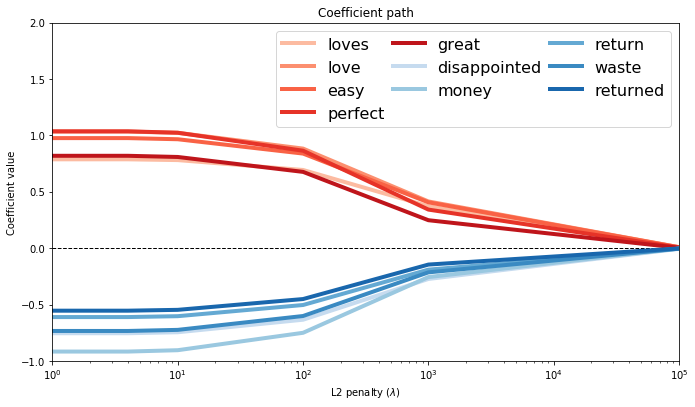

In [131]:
make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])

## Measuring accuracy

Now, let us compute the accuracy of the classifier model. Recall that the accuracy is given by

$$
\mbox{accuracy} = \frac{\mbox{# correctly classified data points}}{\mbox{# total data points}}
$$


Recall from lecture that that the class prediction is calculated using
$$
\hat{y}_i = 
\left\{
\begin{array}{ll}
      +1 & h(\mathbf{x}_i)^T\mathbf{w} > 0 \\
      -1 & h(\mathbf{x}_i)^T\mathbf{w} \leq 0 \\
\end{array} 
\right.
$$

In [132]:
def get_classification_accuracy(feature_matrix, sentiment, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    apply_threshold = np.vectorize(lambda x: 1. if x > 0 else -1.)
    predictions = apply_threshold(scores)
    
    num_correct = (predictions == sentiment).sum()
    accuracy = num_correct / len(feature_matrix)
    
    return accuracy

Below, we compare the accuracy on the **training data** and **validation data** for all the models that were trained in this assignment.  We first calculate the accuracy values and then build a simple report summarizing the performance for the various models.

In [150]:
train_accuracy = {}
train_accuracy[0] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_0_penalty)
train_accuracy[4] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_4_penalty)
train_accuracy[10] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_10_penalty)
train_accuracy[1e2] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_le2_penalty)
train_accuracy[1e3] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e3_penalty)
train_accuracy[1e5] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e5_penalty)

validation_accuracy = {}
validation_accuracy[0] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_0_penalty)
validation_accuracy[4] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_4_penalty)
validation_accuracy[10] =get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_10_penalty)
validation_accuracy[1e2] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_le2_penalty)
validation_accuracy[1e3] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e3_penalty)
validation_accuracy[1e5] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e5_penalty)

In [157]:
# Build a simple report
for key in sorted(validation_accuracy.keys()):
    print "L2 penalty = %g" % key
    print "train accuracy = %s, validation_accuracy = %s" % (train_accuracy[key], validation_accuracy[key])
    print "--------------------------------------------------------------------------------"

L2 penalty = 0
train accuracy = 0.7847233671714912, validation_accuracy = 0.7823834196891192
--------------------------------------------------------------------------------
L2 penalty = 4
train accuracy = 0.7847704736556987, validation_accuracy = 0.7822892133772963
--------------------------------------------------------------------------------
L2 penalty = 10
train accuracy = 0.7846527074451798, validation_accuracy = 0.7819123881300047
--------------------------------------------------------------------------------
L2 penalty = 100
train accuracy = 0.7839696634241703, validation_accuracy = 0.7803108808290156
--------------------------------------------------------------------------------
L2 penalty = 1000
train accuracy = 0.7723343618249052, validation_accuracy = 0.7740932642487046
--------------------------------------------------------------------------------
L2 penalty = 100000
train accuracy = 0.7119438490708246, validation_accuracy = 0.7095619406500235
--------------------------

<function matplotlib.pyplot.tight_layout>

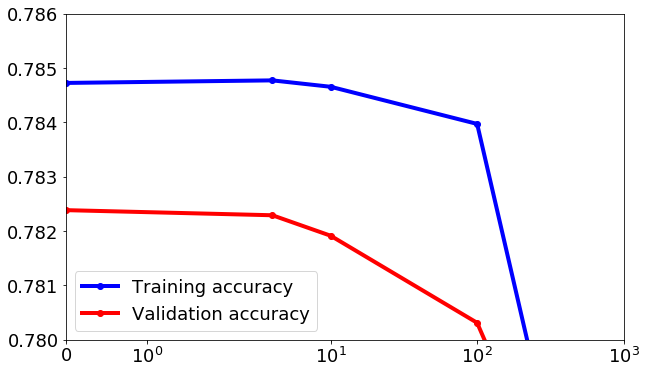

In [180]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 10, 6

sorted_list = sorted(train_accuracy.items(), key=lambda x:x[0])
plt.plot([p[0] for p in sorted_list], [p[1] for p in sorted_list], "bo-", linewidth=4, label="Training accuracy")
sorted_list = sorted(validation_accuracy.items(), key=lambda x:x[0])
plt.plot([p[0] for p in sorted_list], [p[1] for p in sorted_list], "ro-", linewidth=4, label="Validation accuracy")
plt.xscale("symlog")
plt.axis([0, 1e3, 0.78, 0.786])
plt.legend(loc="lower left")
plt.rcParams.update({"font.size": 18})
plt.tight_layout